In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import glob
import collections
# read top neurons
import yaml 
import sys  
sys.path.append('../')
from my_package.cma import get_topk
import os

/tmp/ipykernel_405474/2227021985.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import seaborn as sns
import pandas as pd 
top_neuron_path = '../../pickles/top_neurons/'
method_names = ['recent_baseline', 'baseline_fever','baseline_qqp_mysplit']
datasets_names = ['MNLI', 'FEVER',  'QQP'] 
seed = 1548
masking_mode = 'percent'
do = 'High-overlap'
key = 0.05
data = {}
df = {}
# ,'../../pickles/top_neurons/baseline_fever/top_neuron_1548_percent_High-overlap_all_layers.pickle', 
# ,'../../pickles/top_neurons/recent_baseline/top_neuron_1548_percent_High-overlap_all_layers.pickle']

/tmp/ipykernel_405474/2198082111.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['blue', 'red','green'], ci=None)


[None, None]

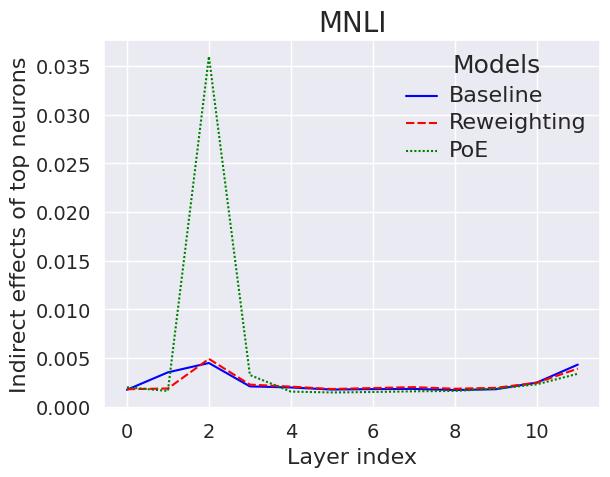

In [3]:
df = [] 
current_dataset = datasets_names[0]
method_names = ['recent_baseline', 'reweight2', 'poe2']
cor_method_names = ['Baseline', 'Reweighting', 'PoE']  

for method_name, cor_name in zip(method_names, cor_method_names):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    x_layer = {}
    y_nie = {}
    treatments = {}

    if seed not in x_layer.keys(): x_layer[method_name] = []
    if seed not in y_nie.keys():   y_nie[method_name] = []
    if seed not in treatments.keys(): treatments[method_name] = []
    x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
    y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
    line_type = [cor_name] * len(y_nie)    
    data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}
    df.append(pd.DataFrame(data=data))
df = pd.concat(df)
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['blue', 'red','green'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title


/tmp/ipykernel_405474/2273116123.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['blue', 'red','green'], ci=None)


[None, None]

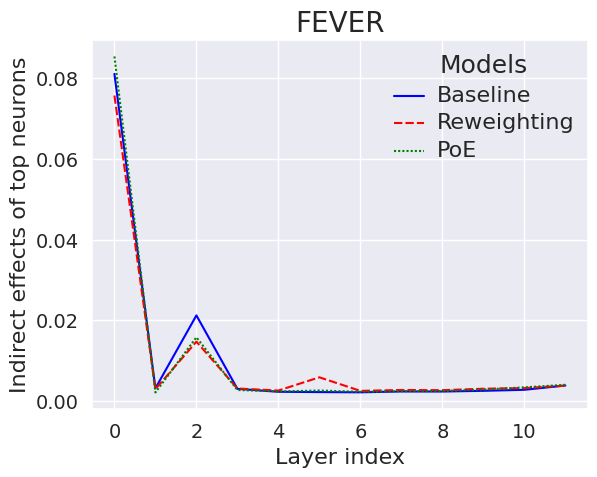

In [4]:
df = [] 
current_dataset = datasets_names[1]
method_names = ['baseline_fever', 'reweight_fever', 'poe_fever']
cor_method_names = ['Baseline', 'Reweighting', 'PoE']  

for method_name, cor_name in zip(method_names, cor_method_names):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    x_layer = {}
    y_nie = {}
    treatments = {}

    if seed not in x_layer.keys(): x_layer[method_name] = []
    if seed not in y_nie.keys():   y_nie[method_name] = []
    if seed not in treatments.keys(): treatments[method_name] = []
    x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
    y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
    line_type = [cor_name] * len(y_nie)    
    data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}
    df.append(pd.DataFrame(data=data))
df = pd.concat(df)
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['blue', 'red','green'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

/tmp/ipykernel_405474/821976426.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['blue', 'red','green'], ci=None)


[None, None]

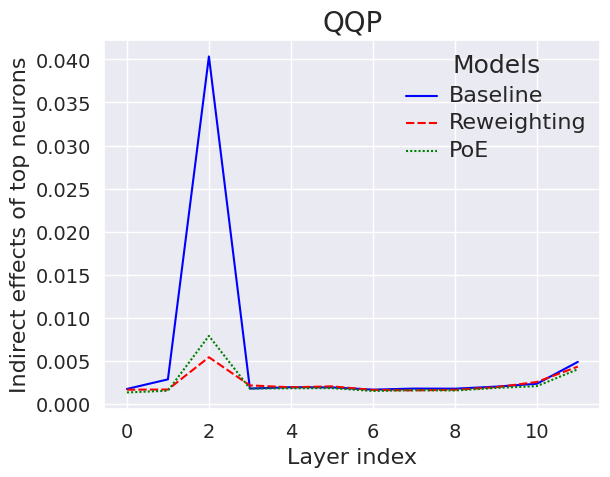

In [5]:
df = [] 
current_dataset = datasets_names[2]
method_names = ['baseline_qqp_mysplit', 'reweight_qqp_mysplit', 'poe_qqp_mysplit']
cor_method_names = ['Baseline', 'Reweighting', 'PoE']  

for method_name, cor_name in zip(method_names, cor_method_names):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    x_layer = {}
    y_nie = {}
    treatments = {}

    if seed not in x_layer.keys(): x_layer[method_name] = []
    if seed not in y_nie.keys():   y_nie[method_name] = []
    if seed not in treatments.keys(): treatments[method_name] = []
    x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
    y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
    line_type = [cor_name] * len(y_nie)    
    data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}
    df.append(pd.DataFrame(data=data))
df = pd.concat(df)
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Models", style="Models", palette=['blue', 'red','green'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

In [6]:
df = [] 
current_dataset = datasets_names[1]
method_names = ['baseline_fever', 'reweight', 'poe']

for method_name in method_names:
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    x_layer = {}
    y_nie = {}
    treatments = {}

    if seed not in x_layer.keys(): x_layer[method_name] = []
    if seed not in y_nie.keys():   y_nie[method_name] = []
    if seed not in treatments.keys(): treatments[method_name] = []
    x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
    y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
    line_type = [method_name] * len(y_nie)    
    data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Models': line_type}
    df.append(pd.DataFrame(data=data))
df = pd.concat(df)

FileNotFoundError: [Errno 2] No such file or directory: '../../pickles/top_neurons/reweight/top_neuron_1548_percent_High-overlap_all_layers.pickle'

In [ ]:
df = [] 
for method_name, dataset_name in zip(method_names, datasets_names):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    x_layer = {}
    y_nie = {}
    treatments = {}

    if seed not in x_layer.keys(): x_layer[method_name] = []
    if seed not in y_nie.keys():   y_nie[method_name] = []
    if seed not in treatments.keys(): treatments[method_name] = []
    x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
    y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
    line_type = [dataset_name] * len(y_nie)    
    data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'DATASETS': line_type}
    df.append(pd.DataFrame(data=data))
df = pd.concat(df)

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="DATASETS", style="DATASETS", palette=['blue', 'red','green'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='24') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

## Baseline 

In [ ]:
method_name = method_names[0]
dataset_name = datasets_names[0]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='24') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [ ]:
method_name = method_names[1]
dataset_name = datasets_names[1]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = ['Negations'] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set_theme(style="darkgrid")
# sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red']).set(title=f'{method_name}')
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
method_name = method_names[2]
dataset_name = datasets_names[2]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])#.set(title=f'{dataset_name}')
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

## Reweight

In [ ]:
method_names = ['reweight2', 'reweight_fever', 'reweight_qqp_mysplit']

In [ ]:
method_name = method_names[0]
dataset_name = datasets_names[0]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [ ]:
method_name = method_names[1]
dataset_name = datasets_names[1]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [ ]:
method_name = method_names[2]
dataset_name = datasets_names[2]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

## Poe

In [ ]:
method_names = ['poe2', 'poe_fever', 'poe_qqp_mysplit']

In [ ]:
method_name = method_names[0]
dataset_name = datasets_names[0]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [ ]:
method_name = method_names[1]
dataset_name = datasets_names[1]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [ ]:
method_name = method_names[2]
dataset_name = datasets_names[2]
path = os.path.join(top_neuron_path, method_name)
path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
x_layer = {}
y_nie = {}
treatments = {}

if seed not in x_layer.keys(): x_layer[method_name] = []
if seed not in y_nie.keys():   y_nie[method_name] = []
if seed not in treatments.keys(): treatments[method_name] = []
x_layer = [ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()]
y_nie = [float(nie) for pos, nie in top_neurons[key].items()]
treatment = [do] * len(y_nie)
data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatment': treatment}

df = pd.DataFrame(data=data)
sns.set(font_scale=10)
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,  x="Layer index", y="Indirect effects of top neurons",  hue="Treatment", palette=['red'])
# plt.legend(title='MNLI', fontsize=20)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{dataset_name}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# for legend text
# plt.setp(sns.get_legend().get_texts(), fontsize='10')  
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [ ]:
# 3 graph 
# each graph 1 dataset 3 models 
# change 
# 